In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

df_movies_metadata = pd.read_csv("./movies_metadata.csv")

D:\Programmes\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_movies_metadata.drop(columns=['adult','belongs_to_collection','genres','homepage','id','imdb_id','original_language','original_title','overview','spoken_languages','status','tagline','video','vote_average','vote_count','popularity','poster_path','production_companies'], inplace=True)
df_movies_metadata.sort_values(by='release_date', inplace=True)

In [3]:
df_movies_metadata = df_movies_metadata[df_movies_metadata.astype(str)['release_date'] != '1']
df_movies_metadata = df_movies_metadata[df_movies_metadata.astype(str)['release_date'] != '12']
df_movies_metadata = df_movies_metadata[df_movies_metadata.astype(str)['release_date'] != '22']
df_movies_metadata.dropna(subset=['release_date'],inplace=True)

In [4]:
liste_pays = []

for i in range(len(df_movies_metadata)):
    if ast.literal_eval(df_movies_metadata.iloc[i]['production_countries']) != []:
        liste_pays.append(ast.literal_eval(df_movies_metadata.iloc[i]['production_countries'])[0]['name'])#convert la ligne en dict
    else:
        liste_pays.append('Unknown')

df_movies_metadata['pays'] = liste_pays
df_movies_metadata.drop(columns=['production_countries'], inplace=True)


df_movies_metadata

,budget,release_date,revenue,runtime,title,pays
34940,0,1874-12-09,0.0,1.0,Passage of Venus,France
34937,0,1878-06-14,0.0,1.0,Sallie Gardner at a Gallop,United States of America
41602,0,1883-11-19,0.0,1.0,Buffalo Running,United States of America
34933,0,1887-08-18,0.0,1.0,Man Walking Around a Corner,United States of America
34934,0,1888-01-01,0.0,1.0,Accordion Player,United Kingdom
34938,0,1888-10-15,0.0,1.0,Traffic Crossing Leeds Bridge,United Kingdom
34939,0,1890-01-01,0.0,1.0,London's Trafalgar Square,United Kingdom
41194,0,1890-03-09,0.0,1.0,Mosquinha,Unknown
34936,0,1890-11-21,0.0,1.0,"Monkeyshines, No. 2",United States of America
39954,0,1890-11-21,0.0,1.0,"Monkeyshines, No. 3",United States of America


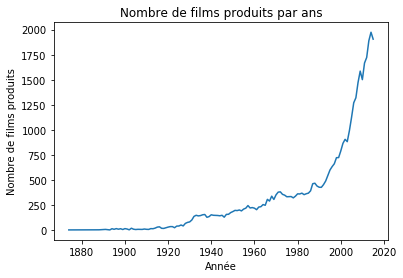

In [5]:
df_dates = df_movies_metadata['release_date'].groupby([pd.to_datetime(df_movies_metadata['release_date']).dt.year]).agg({'count'})
df_dates = df_dates[df_dates.index != 2016]#pas a jour
df_dates = df_dates[df_dates.index != 2017]#pas a jour
df_dates = df_dates[df_dates.index != 2018]#pas a jour
df_dates = df_dates[df_dates.index != 2019]#pas a jour
df_dates = df_dates[df_dates.index != 2020]#pas a jour
plt.plot(df_dates.index, df_dates['count'])
plt.xlabel('Année')
plt.ylabel('Nombre de films produits')
plt.title('Nombre de films produits par ans')
plt.show()

In [6]:
df_pays = df_movies_metadata[df_movies_metadata['pays'] != 'Unknown']
df_pays = df_pays['pays'].groupby([df_pays['pays']]).agg({'count'})
df_pays.sort_values(by='count', ascending=False, inplace=True)

#liste des 20 pays les plus productifs (pour la suite)
liste_20 = list(df_pays.head(20).index)

df_pays

,count
pays,
United States of America,18420
United Kingdom,3067
France,2704
Canada,1498
Japan,1493
Italy,1470
Germany,1418
Russia,799
India,782


In [7]:
df_pays_evo = df_movies_metadata[df_movies_metadata['pays'] != 'Unknown']
df_pays_evo = df_pays_evo['release_date'].groupby([pd.to_datetime(df_pays_evo['release_date']).dt.year, df_pays_evo['pays']]).agg({'count'})

df_pays_evo = df_pays_evo[df_pays_evo.index != 2016]#pas a jour
df_pays_evo = df_pays_evo[df_pays_evo.index != 2017]#pas a jour
df_pays_evo = df_pays_evo[df_pays_evo.index != 2018]#pas a jour
df_pays_evo = df_pays_evo[df_pays_evo.index != 2019]#pas a jour
df_pays_evo = df_pays_evo[df_pays_evo.index != 2020]#pas a jour